# Análise das receitas da prefeitura de João Pessoa

In [259]:
#Imports
%pip install pandas
%pip install matplotlib
import pandas as pd

11976.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


11983.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [260]:
# Read data
df2021 = pd.read_csv(filepath_or_buffer='./data/2021.csv', sep='|')
df2022 = pd.read_csv(filepath_or_buffer='./data/2022.csv', sep='|')
df2023 = pd.read_csv(filepath_or_buffer='./data/2023.csv', sep='|')
df2024 = pd.read_csv(filepath_or_buffer='./data/2024.csv', sep='|')

In [261]:
dtypes =[
    df2021.dtypes,
    df2022.dtypes,
    df2023.dtypes,
    df2024.dtypes
]
dtypes

[mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object,
 mes_ano_referencia     object
 codigo_recebimento      int64
 descricao_receita      object
 fonte_recurso          object
 nome_entidade          object
 valor                 float64
 dtype: object]

In [262]:
# concat all data frames
pd.set_option("float_format",'{:.2f}'.format)
df = pd.concat([df2021, df2022, df2023, df2024])

df['mes_ano'] = pd.to_datetime(df['mes_ano_referencia'])
df['ano'] = df['mes_ano'].dt.year
df['trimestre'] = df['mes_ano'].dt.to_period("Q")
df['trimestre_id'] = df['mes_ano'].dt.quarter
df.head(3)

/var/folders/31/7kmxtjyn24q81lyl0b_12p8r0000gn/T/ipykernel_70227/1841760440.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['mes_ano'] = pd.to_datetime(df['mes_ano_referencia'])


,mes_ano_referencia,codigo_recebimento,descricao_receita,fonte_recurso,nome_entidade,valor,mes_ano,ano,trimestre,trimestre_id
0,1/2021,1990991100,OUTRAS RECEITAS - PRIMARIAS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,3683.95,2021-01-01,2021,2021Q1,1
1,1/2021,1122011100,TAXAS PELA PRESTACAO DE SERVICOS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,136915.73,2021-01-01,2021,2021Q1,1
2,1/2021,1321001100,REMUNERACAO DE DEPOSITOS BANCARIOS - PRINCIPAL,0.209-OUTROS RECURSOS NAO VINCULADOS,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...,155.56,2021-01-01,2021,2021Q1,1


In [263]:
df.describe()

,codigo_recebimento,valor,mes_ano,ano,trimestre_id
count,4216.00,4216.00,4216,4216.00,4216.00
mean,1773965062.34,2647656.63,2022-08-11 16:11:02.618595840,2022.15,2.52
min,1112500100.00,0.00,2021-01-01 00:00:00,2021.00,1.00
25%,1321001100.00,7505.56,2021-11-01 00:00:00,2021.00,1.00
50%,1321010100.00,105383.88,2022-09-01 00:00:00,2022.00,3.00
75%,1728012100.00,1118118.88,2023-06-01 00:00:00,2023.00,4.00
max,7631990100.00,101321872.00,2024-02-01 00:00:00,2024.00,4.00
std,1274010999.37,7491176.55,NaN,0.89,1.14


## Lista descrição receita

In [264]:
descricoes_receitas = pd.DataFrame(df["descricao_receita"].unique(), columns=["descricoes_receitas"]).sort_values("descricoes_receitas")

descricoes_receitas.head(3)

,descricoes_receitas
102,ALUGUEIS E ARRENDAMENTOS - PRINCIPAL
91,AMORTIZACAO DE EMPRESTIMOS CONTRATUAIS
63,AMORTIZACAO DE EMPRESTIMOS CONTRATUAIS - PRINC...


## Lista fonte recurso

In [265]:
fontes_recursos = pd.DataFrame(df["fonte_recurso"].unique(), columns=["fontes_recursos"]).sort_values("fontes_recursos")

fontes_recursos.head(3)

,fontes_recursos
79,# TRANSFERENCIAS ACS.
71,#.TRANSFERENCIAS SUS DO GOVERNO FEDERAL - MANU...
77,#DEMAIS TRANSFERENCIAS.


## Lista entidades

In [266]:
entidades = pd.DataFrame(df["nome_entidade"].unique(), columns=["entidades"]).sort_values("entidades")

entidades.head(3)

,entidades
0,AUTARQUIA ESPECIAL MUNICIPAL DE LIMPEZA URBANA...
1,FUNDACAO CULTURAL DE JOAO PESSOA
2,"FUNDO DE GESTAO, DESENVOLVIMENTO E MODERNIZACA..."


## Total por ano

Text(0.5, 1.0, 'Valor total de receita por ano')

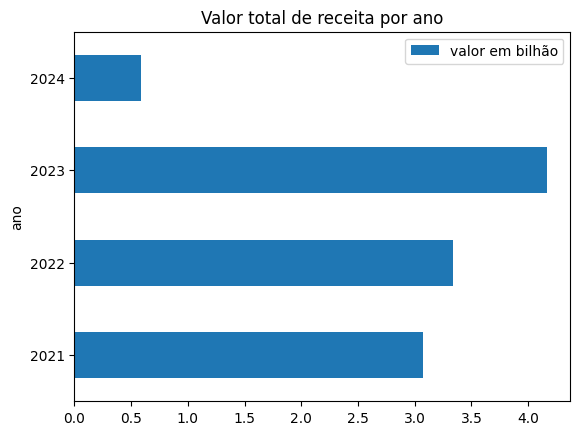

In [267]:
total_ano = df[["ano", "valor"]].groupby("ano").sum()
total_ano["valor"] = total_ano["valor"].div(1_000_000_000)
ax = total_ano.plot.barh()
ax.legend(["valor em bilhão"])
ax.set_title("Valor total de receita por ano")

## Total por trimestre

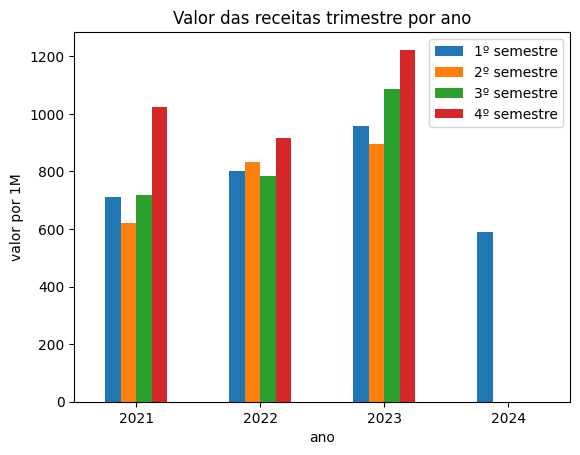

In [268]:
pd.options.mode.copy_on_write = True
valor_trimestre = df[["ano","trimestre_id","valor"]]

valor_trimestre["valor"] = valor_trimestre["valor"].div(1_000_000)
valor_trimestre = pd.pivot_table(valor_trimestre,
                                 values="valor",
                                 columns=["trimestre_id"],
                                 index=["ano"],
                                 aggfunc="sum")

valor_trimestre = pd.DataFrame(valor_trimestre, index=valor_trimestre.index.values)
ax = valor_trimestre.plot.bar(rot=0)
ax.set_title("Valor das receitas trimestre por ano")
ax.set_xlabel("ano")
ax.set_ylabel("valor por 1M")
ax.legend(["1º semestre","2º semestre","3º semestre","4º semestre"])


## Total por receita

In [286]:
M = 1_000_000

ranges={ 
    "A":[(150 * M), (1500 * M)],
    "B":[(15* M), (150 * M)],
    "C":[(5 * M), (15 * M)],
    "D":[(1 * M), (5 * M)],
    "E":[(0.5 * M), (1 * M)],
    "F":[(0), (0.5 * M)],
}

def classifica_valor_receita_anual(valor):

    for v in ranges.items():
        if valor >= v[1][0] and valor <= v[1][1]:
            return v[0]

### Fontes com valores totais maiores que 100M

<Axes: xlabel='classe'>

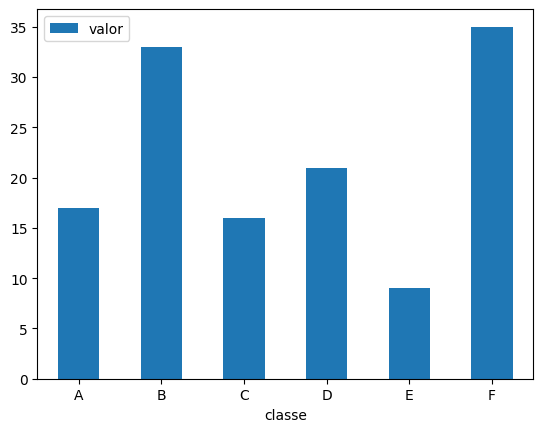

In [289]:
total_fonte = df[["descricao_receita","valor"]].groupby(["descricao_receita"]).sum()
total_fonte["classe"] =  total_fonte.apply(lambda x: classifica_valor_receita_anual(x["valor"]), axis=1) 
total_fonte = total_fonte.groupby(["classe"]).count()
total_fonte.plot.bar(rot=0)